# **Fashion MNIST Image Classification Using CNN with TensorFlow**

In this project, we will classify Fashion-MNIST dataset using Convolutional Neural Networks with TensorFlow.</p>


In [15]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout
from sklearn.metrics import classification_report, confusion_matrix

tf.random.set_seed(0)

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("Name:", gpu.name, "  Type:", gpu.device_type)
else:
    print("No GPU devices found")

Name: /physical_device:GPU:0   Type: GPU


In [3]:
# Function for showing the image

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy(), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

## Prepare Dataset

In [4]:
# Load FashionMNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

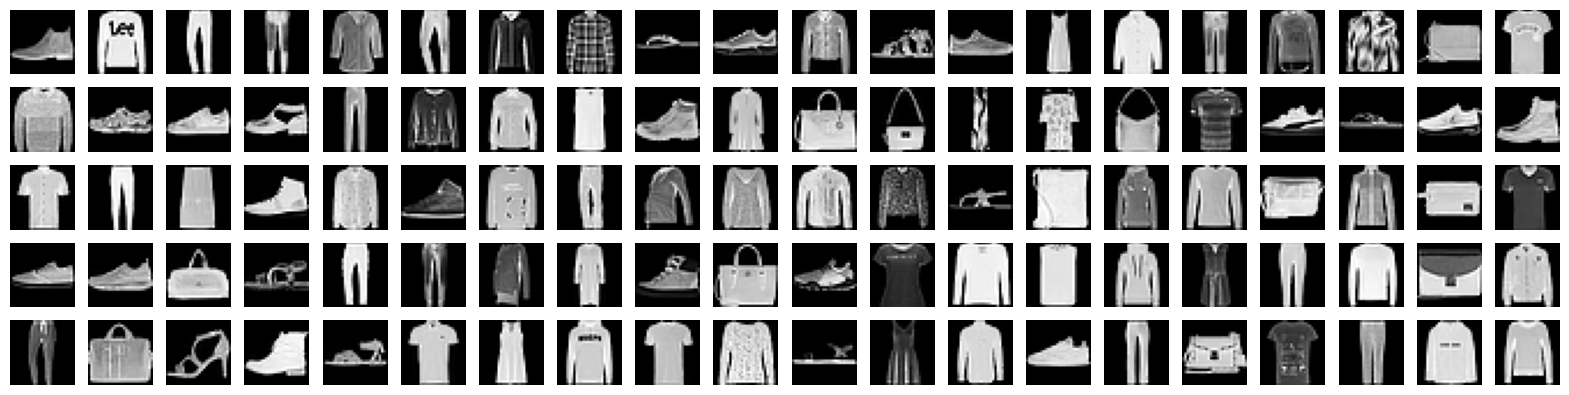

In [13]:
plt.figure(figsize=(20, 20))
for i in range(100):  # Plot the first 100 images
    plt.subplot(20, 20, i + 1)
    plt.imshow(X_val[i], cmap='gray')
    plt.axis('off')
plt.show()

In [6]:
model = tf.keras.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    Dense(600, activation='relu'),
    Dropout(0.25),

    Dense(120, activation='relu'),

    Dense(10, activation='softmax')
])

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
criterion = tf.keras.losses.sparse_categorical_crossentropy
model.compile(loss=criterion, optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                        

In [8]:
history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
600/600 [==============================] - 9s 7ms/step - loss: 0.9270 - accuracy: 0.6870 - val_loss: 0.5525 - val_accuracy: 0.8088
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.5636 - accuracy: 0.8013 - val_loss: 0.4630 - val_accuracy: 0.8382
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.4875 - accuracy: 0.8279 - val_loss: 0.4245 - val_accuracy: 0.8503
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 0.4447 - accuracy: 0.8429 - val_loss: 0.3983 - val_accuracy: 0.8599
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.4144 - accuracy: 0.8533 - val_loss: 0.3819 - val_accuracy: 0.8632
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.3937 - accuracy: 0.8613 - val_loss: 0.3656 - val_accuracy: 0.8708
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.3774 - accuracy: 0.8675 - val_loss: 0.3577 - val_accuracy: 0.8738
Epoch 

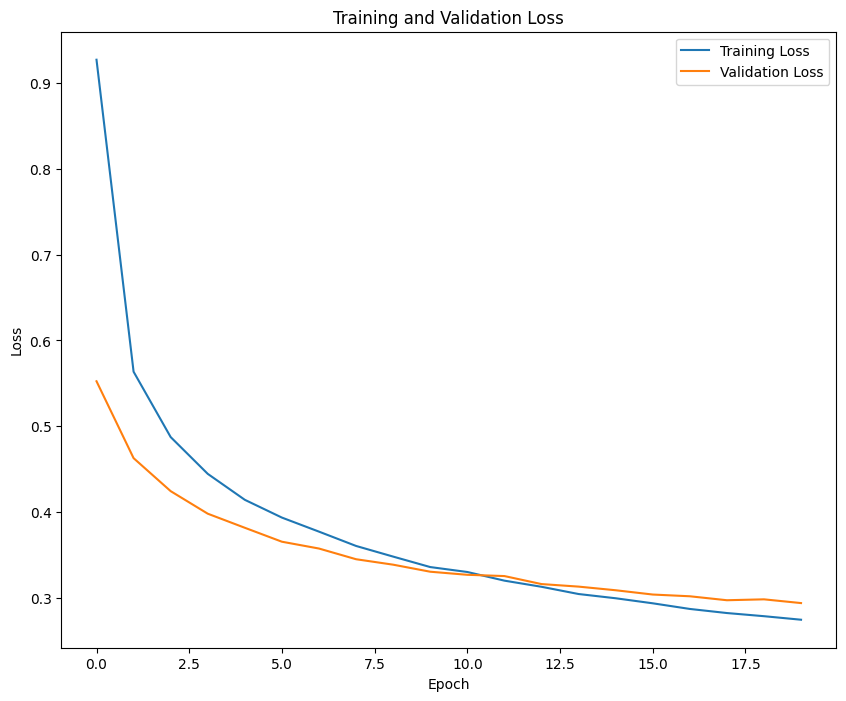

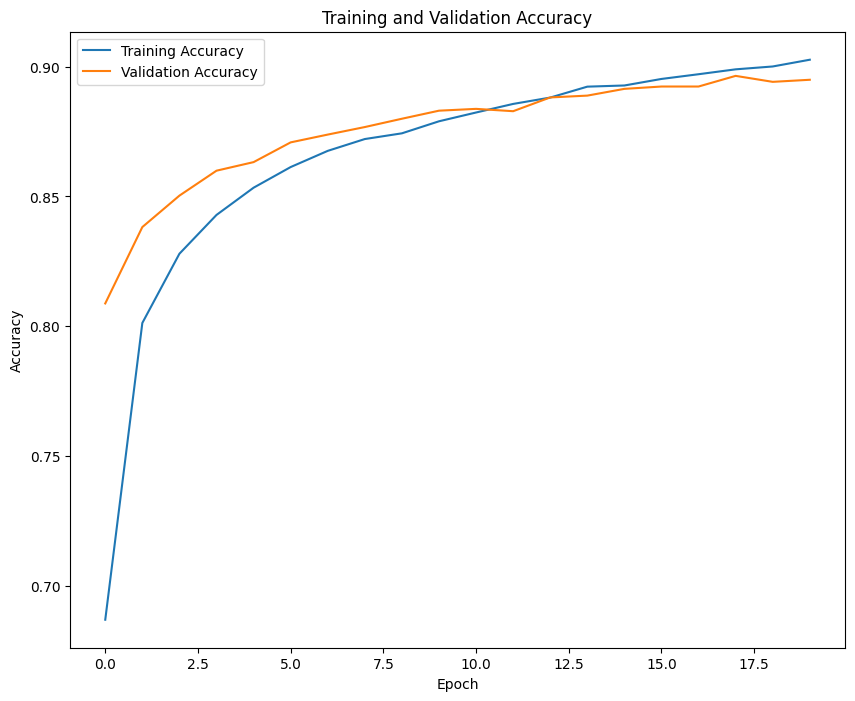

In [14]:
# Plot training loss and validation loss
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [10]:
# Predict labels for validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
print(classification_report(y_val, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.80      0.83      1000
           3       0.88      0.92      0.90      1000
           4       0.82      0.83      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.69      0.73      0.71      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.89      0.90     10000



313/313 [==============================] - 1s 2ms/step


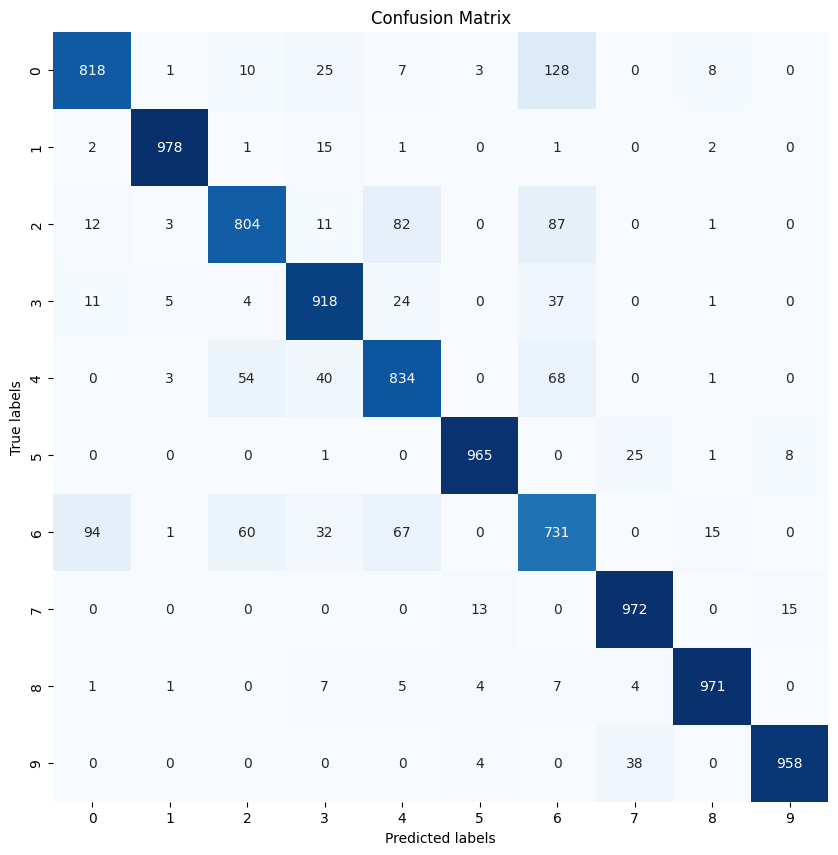

In [16]:
# Predict labels for validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

<h3>Cost function</h3>


It is a function that is used to minimize the difference between the right answers (labels) and estimated outputs by our Network. Here we use the cross entropy function, which is a popular cost function used for categorical models.  The function is defined in terms of probabilities, which is why we must used normalized vectors.  It is given as:

$$ CrossEntropy = \sum{y_{Label}\cdot \log(y_{Prediction})}$$


In [15]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(y_train, model(x_train)).numpy()

138155.11

<h3>Type of optimization: Gradient Descent</h3>


This is the part where you configure the optimizer for your Neural Network. There are several optimizers available, in our case we will use Gradient Descent because it is a well established optimizer.


In [16]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

It is common to run intermittent diagnostics (such as accuracy and loss over entire dataset) during training.  Here we compute a summary statistic on the test dataset as well.  Fitness metrics for the training data should closely match those of the test data.  If the test metrics are distinctly less favorable, this can be a sign of overfitting.


In [19]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.8395333
test accuracy 0.8348


<h4>Several options as follow:</h4>
<ul>
    <li>Regularization of Neural Networks using DropConnect</li>
    <li>Multi-column Deep Neural Networks for Image Classification</li> 
    <li>APAC: Augmented Pattern Classification with Neural Networks</li>
    <li>Simple Deep Neural Network with Dropout</li>
</ul>
<h4>In the next part we are going to explore the option:</h4>
<ul>
    <li>Simple Deep Neural Network with Dropout (more than 1 hidden layer)</li>
</ul> 


<hr>


The input image is 28 pixels by 28 pixels, 1 channel (grayscale). In this case, the first dimension is the <b>batch number</b> of the image, and can be of any size (so we set it to -1). The second and third dimensions are width and height, and the last one is the image channels.


In [23]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])  
x_image_train = tf.cast(x_image_train, 'float32') 

x_image_test = tf.reshape(x_test, [-1,28,28,1]) 
x_image_test = tf.cast(x_image_test, 'float32') 

#creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

Reducing data set size from this point on because the Skills Netowrk Labs only provides 4 GB of main memory but 8 are needed otherwise. If you want to run faster (in multiple CPU or GPU) and on the whole data set consider using IBM Watson Studio. You get 100 hours of free usage every month. https://github.com/IBM/skillsnetwork/wiki/Watson-Studio-Setup


In [24]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000, 28, 28, 1])
y_train = tf.slice(y_train,[0,0],[10000, 10])

<h3>Convolutional Layer 1</h3>


<h4>Defining kernel weight and bias</h4>
We define a kernel here. The Size of the filter/kernel is 5x5;  Input channels is 1 (grayscale);  and we need 32 different feature maps (here, 32 feature maps means 32 different filters are applied on each image. So, the output of convolution layer would be 28x28x32). In this step, we create a filter / kernel tensor of shape <code>[filter_height, filter_width, in_channels, out_channels]</code>


In [25]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

<img src="https://ibm.box.com/shared/static/vn26neef1nnv2oxn5cb3uueowcawhkgb.png" style="width: 800px; height: 400px;" alt="HTML5 Icon">

</h4>Convolve with weight tensor and add biases.</h4>

To create convolutional layer, we use <b>tf.nn.conv2d</b>. It computes a 2-D convolution given 4-D input and filter tensors.

Inputs:
- tensor of shape [batch, in_height, in_width, in_channels]. x of shape [batch_size,28 ,28, 1]
- a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]. W is of size [5, 5, 1, 32]
- stride which is  [1, 1, 1, 1]. The convolutional layer, slides the "kernel window" across the input tensor. As the input tensor has 4 dimensions:  [batch, height, width, channels], then the convolution operates on a 2D window on the height and width dimensions. __strides__ determines how much the window shifts by in each of the dimensions. As the first and last dimensions are related to batch and channels, we set the stride to 1. But for second and third dimension, we could set other values, e.g. [1, 2, 2, 1]
    
    
Process:
- Change the filter to a 2-D matrix with shape [5\*5\*1,32]
- Extracts image patches from the input tensor to form a *virtual* tensor of shape `[batch, 28, 28, 5*5*1]`.
- For each batch, right-multiplies the filter matrix and the image vector.

Output:
- A `Tensor` (a 2-D convolution) of size tf.Tensor 'add_7:0' shape=(?, 28, 28, 32)- Notice: the output of the first convolution layer is 32 [28x28] images. Here 32 is considered as volume/depth of the output image.


In [26]:
def convolve1(x):
    return(
        tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

<img src="https://ibm.box.com/shared/static/iizf4ui4b2hh9wn86pplqxu27ykpqci9.png" style="width: 800px; height: 400px;" alt="HTML5 Icon">


<h4>Apply the ReLU activation Function</h4>


In this step, we just go through all outputs convolution layer, <b>convolve1</b>, and wherever a negative number occurs, we swap it out for a 0. It is called ReLU activation Function.<br> Let f(x) is a ReLU activation function $f(x) = max(0,x)$.


In [27]:
def h_conv1(x): return(tf.nn.relu(convolve1(x)))

<h4>Apply the max pooling</h4>


<b>max pooling</b> is a form of non-linear down-sampling. It partitions the input image into a set of rectangles and, and then find the maximum value for that region. 

Lets use <b>tf.nn.max_pool</b> function to perform max pooling. 
<b>Kernel size:</b> 2x2 (if the window is a 2x2 matrix, it would result in one output pixel)  
<b>Strides:</b> dictates the sliding behaviour of the kernel. In this case it will move 2 pixels everytime, thus not overlapping. The input is a matrix of size 28x28x32, and the output would be a matrix of size 14x14x32.

<img src="https://ibm.box.com/shared/static/kmaja90mn3aud9mro9cn8pbbg1h5pejy.png" alt="HTML5 Icon" style="width: 800px; height: 400px;"> 



In [28]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

First layer completed


<h3>Convolutional Layer 2</h3>
<h4>Weights and Biases of kernels</h4>


We apply the convolution again in this layer. Lets look at the second layer kernel:  
- Filter/kernel: 5x5 (25 pixels) 
- Input channels: 32 (from the 1st Conv layer, we had 32 feature maps) 
- 64 output feature maps  

<b>Notice:</b> here, the input image is [14x14x32], the filter is [5x5x32], we use 64 filters of size [5x5x32], and the output of the convolutional layer would be 64 convolved image, [14x14x64].

<b>Notice:</b> the convolution result of applying a filter of size [5x5x32] on image of size [14x14x32] is an image of size [14x14x1], that is, the convolution is functioning on volume.


In [29]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

<h4>Convolve image with weight tensor and add biases.</h4>


In [30]:
def convolve2(x): 
    return( 
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

<h4>Apply the ReLU activation Function</h4>


In [31]:
def h_conv2(x):  return tf.nn.relu(convolve2(x))

<h4>Apply the max pooling</h4>


In [32]:
def conv2(x):  
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

Second layer completed. So, what is the output of the second layer, layer2?
- it is 64 matrix of [7x7]


<h3>Fully Connected Layer</h3>


You need a fully connected layer to use the Softmax and create the probabilities in the end. Fully connected layers take the high-level filtered images from previous layer, that is all 64 matrices, and convert them to a flat array.

So, each matrix [7x7] will be converted to a matrix of [49x1], and then all of the 64 matrix will be connected, which make an array of size [3136x1]. We will connect it into another layer of size [1024x1]. So, the weight between these 2 layers will be [3136x1024]


<img src="https://ibm.box.com/shared/static/pr9mnirmlrzm2bitf1d4jj389hyvv7ey.png" alt="HTML5 Icon" style="width: 800px; height: 400px;"> 


<h4>Flattening Second Layer</h4>


In [33]:
def layer2_matrix(x): return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

<h4>Weights and Biases between layer 2 and 3</h4>


Composition of the feature map from the last layer (7x7) multiplied by the number of feature maps (64); 1027 outputs to Softmax layer


In [34]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

<h4>Matrix Multiplication (applying weights and biases)</h4>


In [35]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

<h4>Apply the ReLU activation Function</h4>


In [36]:
def h_fc1(x): return tf.nn.relu(fcl(x))

Third layer completed


<h4>Dropout Layer, Optional phase for reducing overfitting</h4>


It is a phase where the network "forget" some features. At each training step in a mini-batch, some units get switched off randomly so that it will not interact with the network. That is, it weights cannot be updated, nor affect the learning of the other network nodes.  This can be very useful for very large neural networks to prevent overfitting.


In [37]:
keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), keep_prob)

<h4>Readout Layer (Softmax Layer)</h4>


Type: Softmax, Fully Connected Layer.


<h4>Weights and Biases</h4>


In last layer, CNN takes the high-level filtered images and translate them into votes using softmax.
Input channels: 1024 (neurons from the 3rd Layer); 10 output features


In [38]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

<h4>Matrix Multiplication (applying weights and biases)</h4>


In [39]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

<h4>Apply the Softmax activation Function</h4>
<b>softmax</b> allows us to interpret the outputs of <b>fcl4</b> as probabilities. So, <b>y_conv</b> is a tensor of probabilities.


In [40]:
def y_CNN(x): return tf.nn.softmax(fc(x))

---


<a id="ref7"></a>
<h2>Summary of the Deep Convolutional Neural Network</h2>


Now is time to remember the structure of  our network


#### 0) Input - MNIST dataset
#### 1) Convolutional and Max-Pooling
#### 2) Convolutional and Max-Pooling
#### 3) Fully Connected Layer
#### 4) Processing - Dropout
#### 5) Readout layer - Fully Connected
#### 6) Outputs - Classified digits


---


<a id="ref8"></a>
<h2>Define functions and train the model</h2>


<h4>Define the loss function</h4>

We need to compare our output, layer4 tensor, with ground truth for all mini_batch. we can use <b>cross entropy>/b> to see how bad our CNN is working - to measure the error at a softmax layer.

The following code shows an toy sample of cross-entropy for a mini-batch of size 2 which its items have been classified. You can run it (first change the cell type to <b>code</b> in the toolbar) to see how cross entropy changes.


<b>reduce_sum</b> computes the sum of elements of <b>(y_ * tf.log(layer4)</b> across second dimension of the tensor, and <b>reduce_mean</b> computes the mean of all elements in the tensor..

$$ CrossEntropy = \sum{y_{Label}\cdot \log(y_{Prediction})}$$


In [41]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

<h4>Define the optimizer</h4>

It is obvious that we want minimize the error of our network which is calculated by cross_entropy metric. To solve the problem, we have to compute gradients for the loss (which is minimizing the cross-entropy) and apply gradients to variables. It will be done by an optimizer: GradientDescent or Adagrad. 


In [42]:
optimizer = tf.keras.optimizers.Adam(1e-4)

Following the convention of our first example, we will use `GradientTape` to define a model.


In [43]:
variables = [W_conv1, b_conv1, W_conv2, b_conv2, 
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()


In [44]:
"""results = []
increment = 1000
for start in range(0,60000,increment):
    s = tf.slice(x_image_train,[start,0,0,0],[start+increment-1, 28, 28, 1])
    t = y_CNN(s)
    #results.append(t)
"""

'results = []\nincrement = 1000\nfor start in range(0,60000,increment):\n    s = tf.slice(x_image_train,[start,0,0,0],[start+increment-1, 28, 28, 1])\n    t = y_CNN(s)\n    #results.append(t)\n'

<h4>Define prediction</h4>
Do you want to know how many of the cases in a mini-batch has been classified correctly? lets count them.


In [45]:
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))

<h4>Define accuracy</h4>
It makes more sense to report accuracy using average of correct cases.


In [46]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

<h4>Run session, train</h4>


<i>If you want a fast result (<b>it might take sometime to train it</b>)</i>


In [47]:
loss_values=[]
accuracies = []
epochs = 5

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy)) 
            
    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )  

epoch  0 batch 50 loss: 98.08951 accuracy 0.42
epoch  0 batch 100 loss: 64.46271 accuracy 0.74
epoch  0 batch 150 loss: 36.23667 accuracy 0.66
epoch  0 batch 200 loss: 24.543077 accuracy 0.84
epoch  0 batch 250 loss: 46.3984 accuracy 0.82
epoch  0 batch 300 loss: 21.702133 accuracy 0.78
epoch  0 batch 350 loss: 22.548836 accuracy 0.82
epoch  0 batch 400 loss: 14.155779 accuracy 0.84
epoch  0 batch 450 loss: 22.066906 accuracy 0.86
epoch  0 batch 500 loss: 13.546479 accuracy 0.88
epoch  0 batch 550 loss: 19.08943 accuracy 0.9
epoch  0 batch 600 loss: 19.549133 accuracy 0.94
epoch  0 batch 650 loss: 16.558563 accuracy 0.9
epoch  0 batch 700 loss: 9.979947 accuracy 0.94
epoch  0 batch 750 loss: 25.779064 accuracy 0.86
epoch  0 batch 800 loss: 16.261154 accuracy 0.86
epoch  0 batch 850 loss: 14.82221 accuracy 0.94
epoch  0 batch 900 loss: 9.995994 accuracy 0.96
epoch  0 batch 950 loss: 13.034338 accuracy 0.94
epoch  0 batch 1000 loss: 15.73631 accuracy 0.88
epoch  0 batch 1050 loss: 6.6991

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong><i>Wow...95% accuracy after only 1 epoch!  You can increase the number of epochs in the previsous cell if you REALLY have time to wait, or you are running it using PowerAI (<b>change the type of the cell to code</b>)</i></strong></font>


<i>PS. If you have problems running this notebook, please shutdown all your Jupyter runnning notebooks, clear all cells outputs and run each cell only after the completion of the previous cell.</i>


<hr>


<a id="ref9"></a>
<h2>Evaluate the model</h2>


Print the evaluation to the user


In [48]:
j=0
acccuracies=[]
# evaluate accuracy by batch and average...reporting every 100th batch
for x_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        #accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) ) 
import numpy as np
print("accuracy of entire set", str(np.mean(accuracies)))            

batch 100 accuracy 0.98
batch 200 accuracy 1.0
batch 300 accuracy 1.0
batch 400 accuracy 0.98
batch 500 accuracy 0.98
batch 600 accuracy 0.98
batch 700 accuracy 0.98
batch 800 accuracy 1.0
batch 900 accuracy 0.98
batch 1000 accuracy 0.98
batch 1100 accuracy 0.98
batch 1200 accuracy 1.0
accuracy of entire set 0.96716005


<h3>Visualization</h3>


Do you want to look at all the filters?


In [49]:
kernels = tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1])

In [50]:
!wget --output-document utils1.py https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week2/data/utils.py
import utils1
import imp
imp.reload(utils1)
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels.numpy(), img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

'wget' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'utils1'

Do you want to see the output of an image passing through first convolution layer?


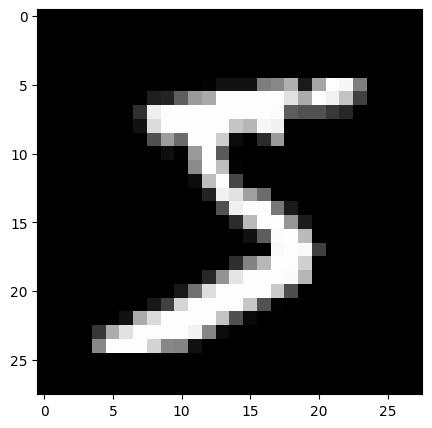

In [51]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = [x_image_train[0]]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

C:\Users\admin\AppData\Local\Temp\ipykernel_11152\926207760.py:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  n_rows = np.math.ceil(filters / n_columns) + 1


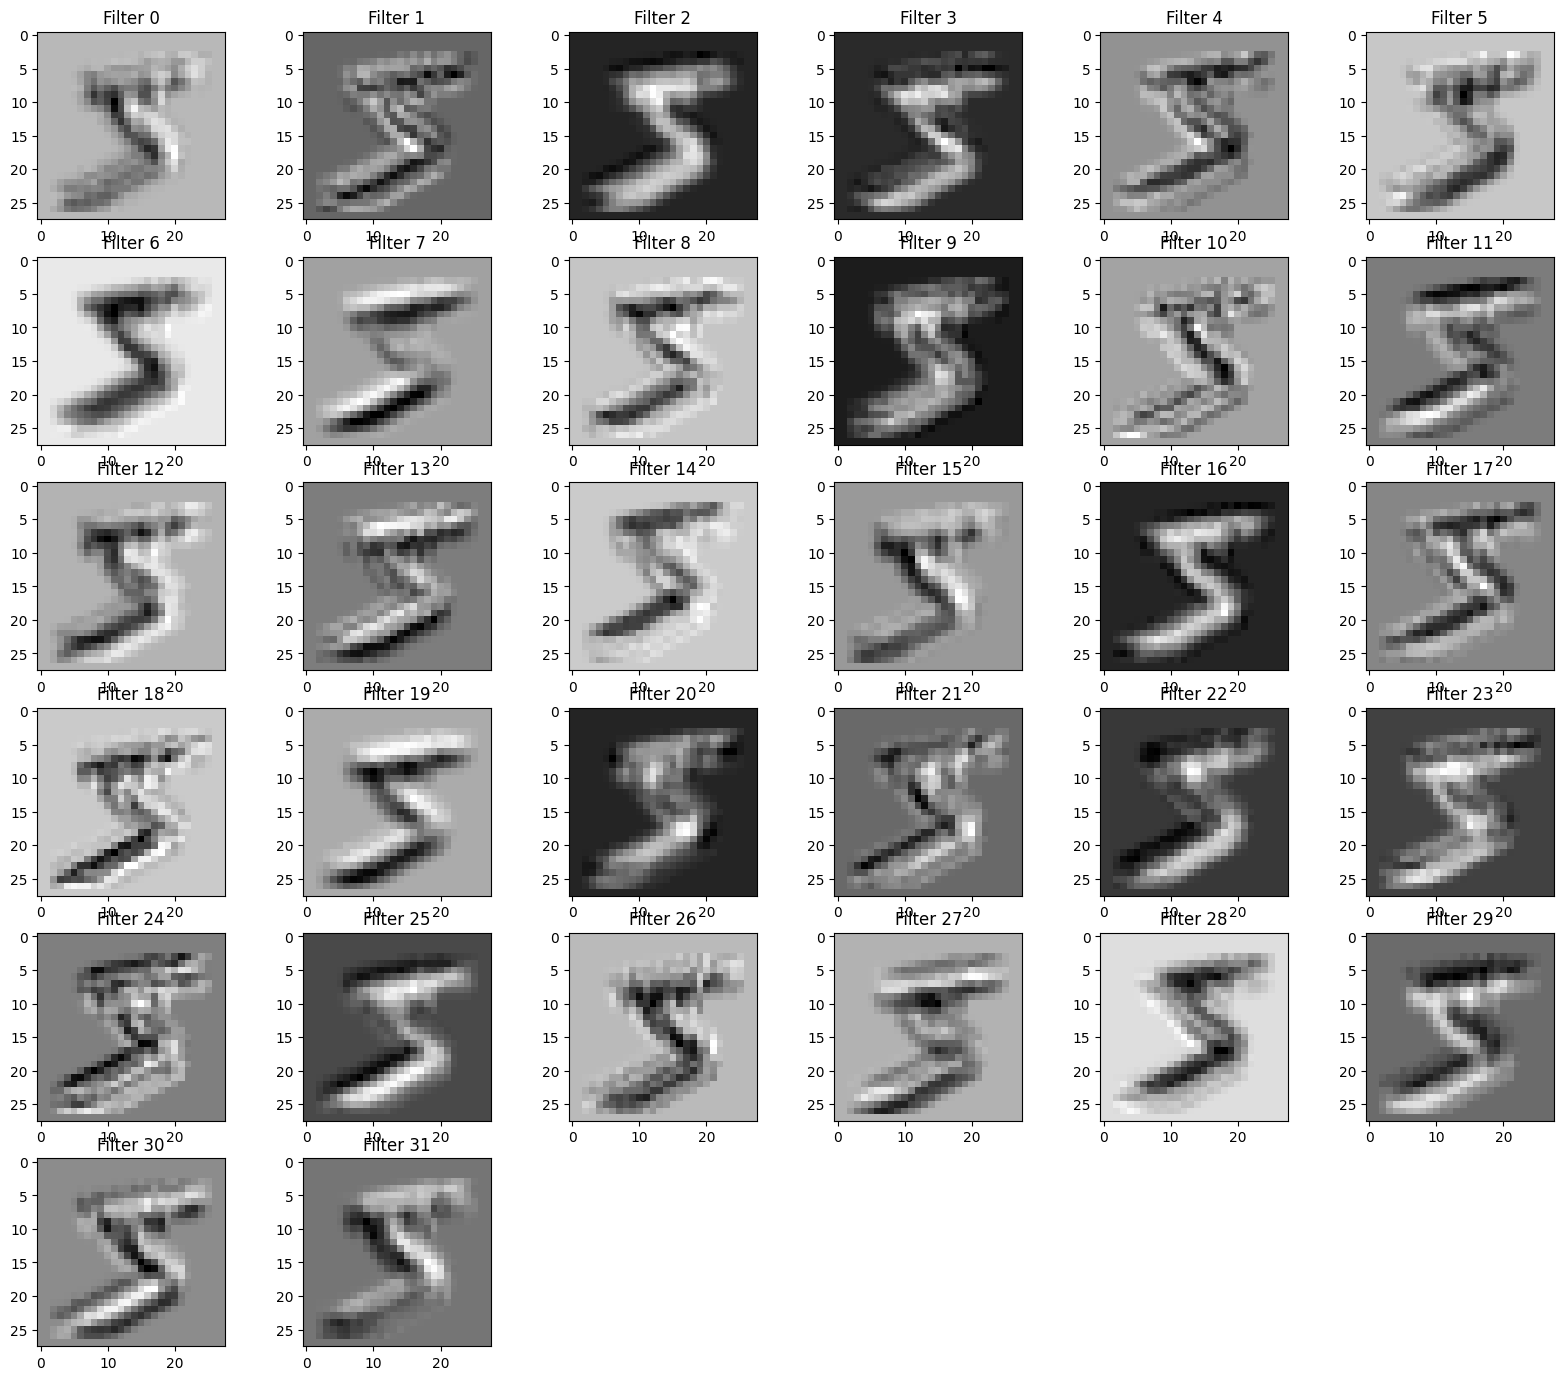

In [52]:
#ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
keep_prob=1.0
sampleimage = np.array(sampleimage)
ActivatedUnits = convolve1(sampleimage)
                           
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

What about second convolution layer?


C:\Users\admin\AppData\Local\Temp\ipykernel_11152\58957405.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  n_rows = np.math.ceil(filters / n_columns) + 1


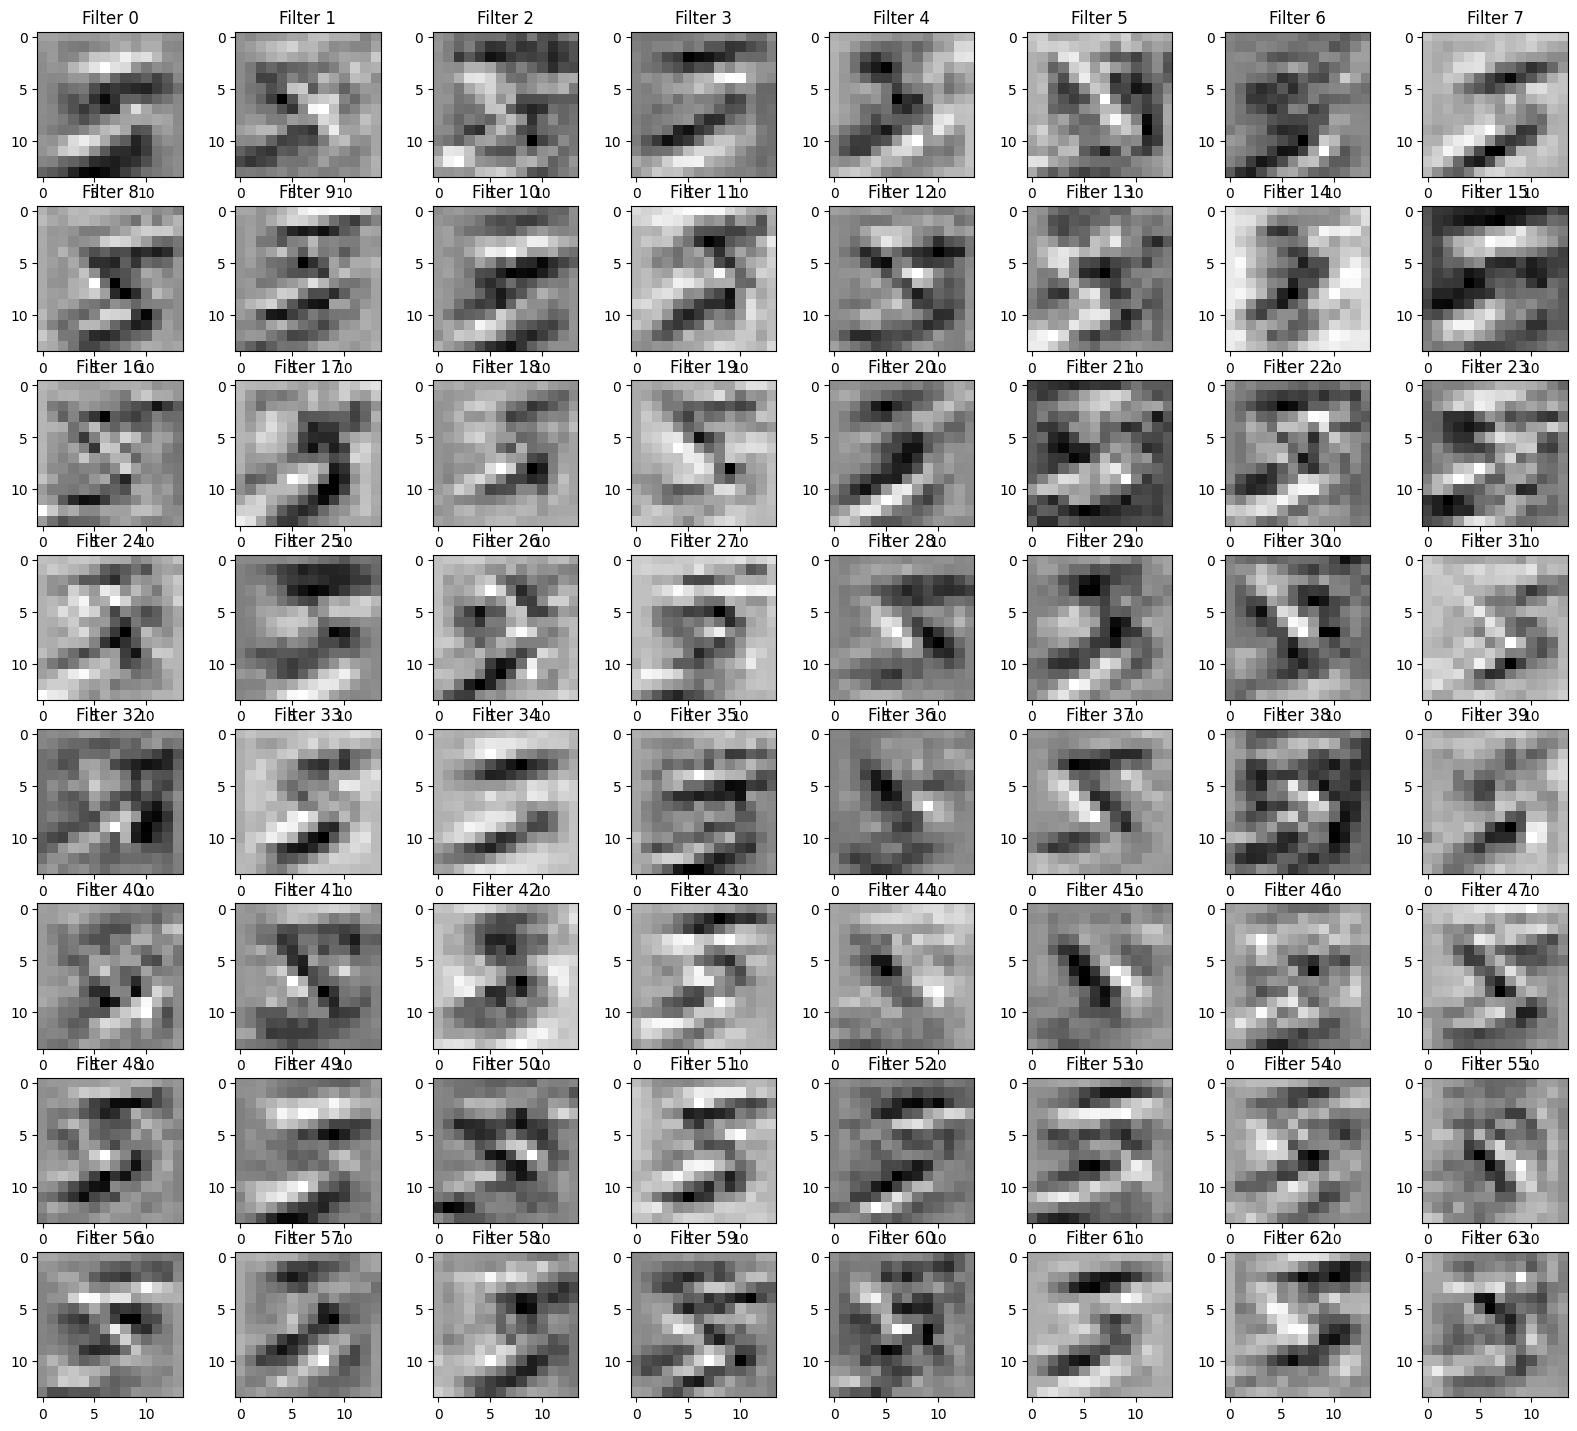

In [53]:
#ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
sampleimage = np.array(sampleimage)
ActivatedUnits = convolve2(sampleimage)
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

## Want to learn more?

Also, you can use __Watson Studio__ to run these notebooks faster with bigger datasets.__Watson Studio__ is IBM’s leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark, and NVIDIA GPU accelerated hardware environemnts, as well as and popular libraries pre-packaged in the cloud, __Watson Studio__ enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of __Watson Studio__ users today with a free account at [Watson Studio](https://cocl.us/ML0120EN_DSX).This is the end of this lesson. Thank you for reading this notebook, and good luck on your studies.


### Thanks for completing this lesson!


Created by <a href="https://linkedin.com/in/saeedaghabozorgi"> Saeed Aghabozorgi </a>, <a href="https://linkedin.com/in/luisotsm">Luis Otavio Silveira Martins</a>, <a href="https://linkedin.com/in/erich-natsubori-sato"> Erich Natsubori Sato </a></h4>

Updated to TF 2.X by  <a href="https://ca.linkedin.com/in/nilmeier"> Jerome Nilmeier</a><br />


### References:

https://en.wikipedia.org/wiki/Deep_learning    
http://ruder.io/optimizing-gradient-descent/<br> 
http://yann.lecun.com/exdb/mnist/  
https://www.quora.com/Artificial-Neural-Networks-What-is-the-difference-between-activation-functions  
https://www.tensorflow.org/versions/r0.9/tutorials/mnist/pros/index.html  


<hr>

Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).
